In [1]:
import re
import pandas as pd 
import numpy as np  
import seaborn as sns
import string
import nltk
from nltk.stem.porter import *
import plotly.express as px

In [2]:

df = pd.read_csv(r"C:\Users\gsail\Downloads\salaries.csv")
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,13972.000000,1.397200e+04,13972.000000,13972.000000
mean,2023.085600,1.660011e+05,150028.812124,33.334526
std,0.687612,3.661545e+05,68634.306349,46.682931
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103000.000000,0.000000
50%,2023.000000,1.422000e+05,141600.000000,0.000000
75%,2024.000000,1.880000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [5]:
df.duplicated().sum()

5378

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


In [9]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [31]:
print('--------No of Unique Values---------')
print('Column   :   Number of Unique Values')
print('------------------------------------')
for col in df.columns:
    unique_num = len(df[col].value_counts())
    print(f'{col} : {unique_num}')
print('------------------------------------')


--------No of Unique Values---------
Column   :   Number of Unique Values
------------------------------------
work_year : 5
experience_level : 4
employment_type : 4
job_title : 146
salary : 2237
salary_currency : 23
salary_in_usd : 2596
employee_residence : 88
remote_ratio : 3
company_location : 77
company_size : 3
------------------------------------


[]

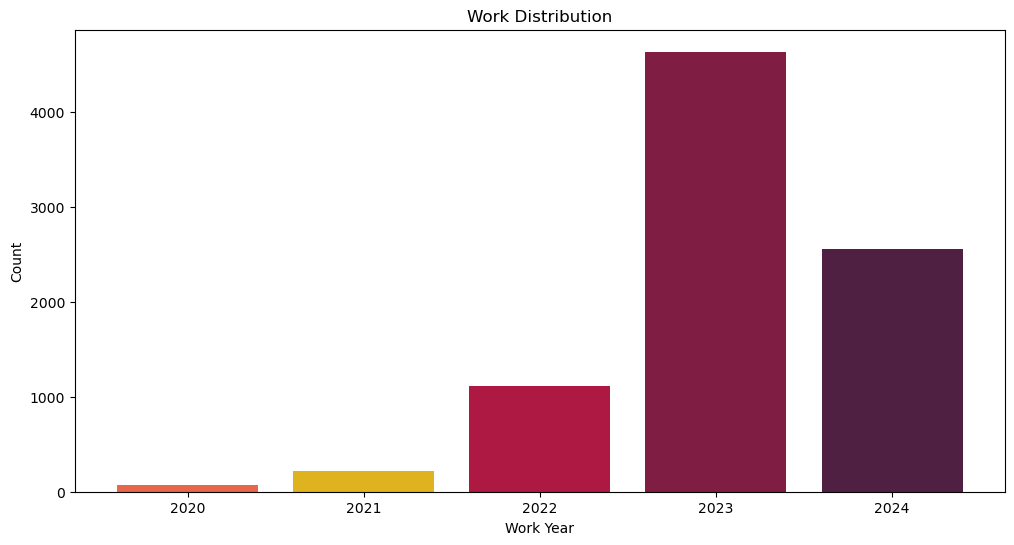

In [39]:
df['experience_level'].replace({'EN':'Entry-Level','MI':'Mid-Level','EX':'Executive Level','SE':'Senior'},inplace=True)
df['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)
plt.figure(figsize = (12,6))
custom_palette = ["#FF5733", "#FFC300", "#C70039", "#900C3F", "#581845"]
sns.countplot(data = df,x = 'work_year', palette=custom_palette)
plt.xlabel("Work Year")
plt.ylabel("Count")
plt.title("Work Distribution")
plt.plot()


[]

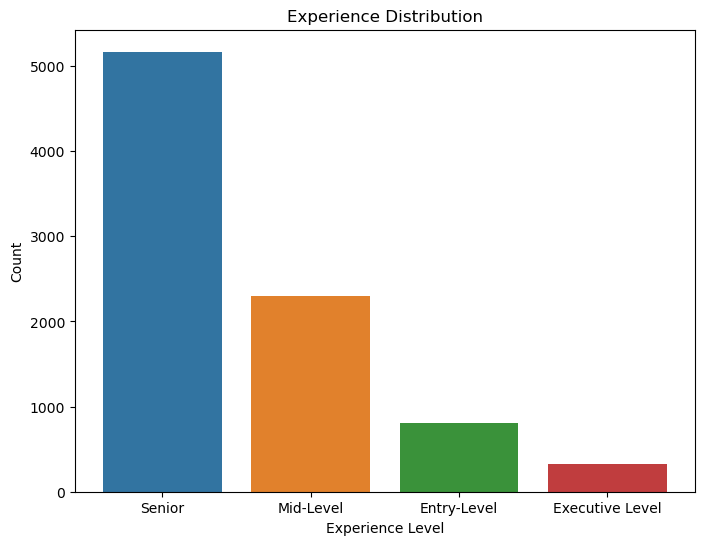

In [15]:
plt.figure(figsize = (8,6))
sns.countplot(data = df,x = 'experience_level')
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.title("Experience Distribution")
plt.plot()


[]

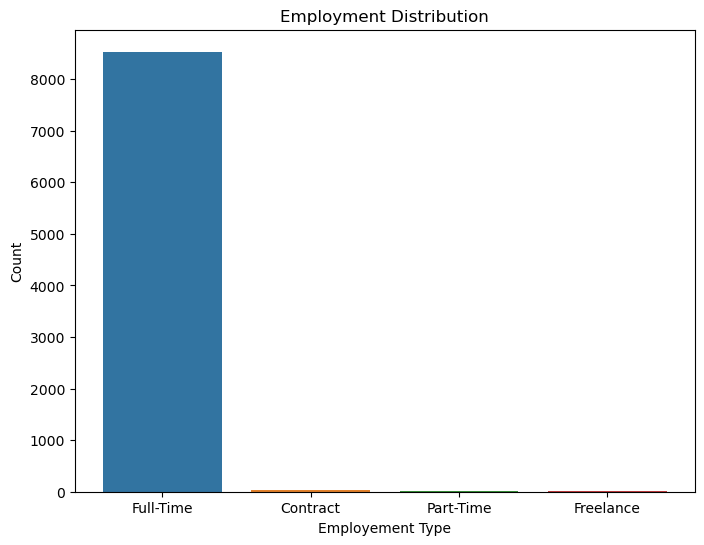

In [16]:
plt.figure(figsize = (8,6))
sns.countplot(data = df,x = 'employment_type')
plt.xlabel("Employement Type")
plt.ylabel("Count")
plt.title("Employment Distribution")
plt.plot()

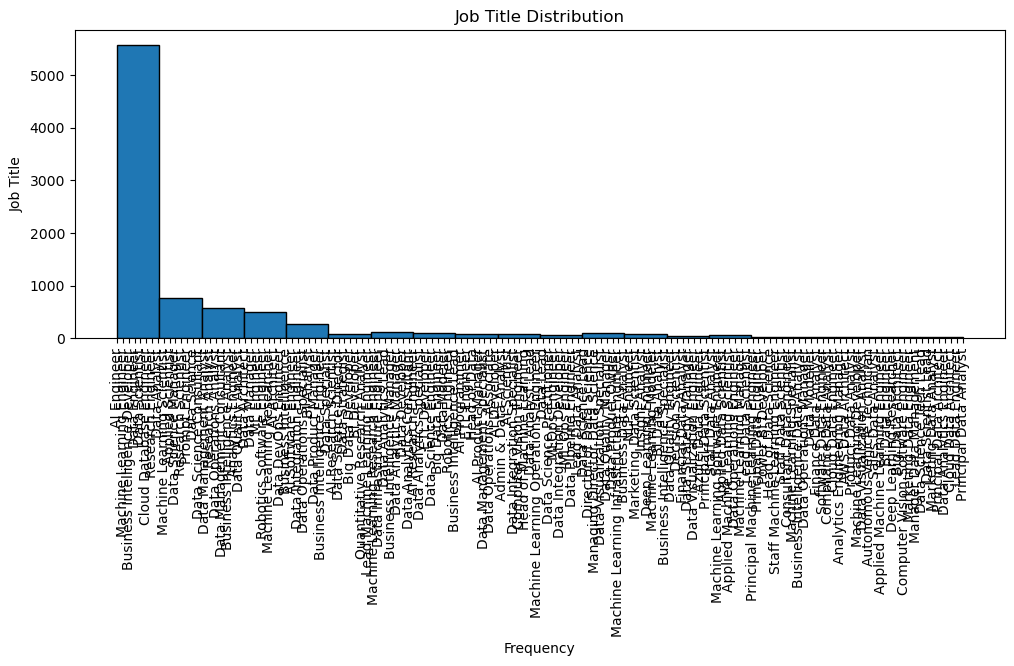

In [41]:

plt.figure(figsize=(12, 4))
plt.hist(df["job_title"], bins=20, edgecolor="black")
plt.xlabel("Frequency")
plt.ylabel("Job Title")
plt.xticks(rotation=90)
plt.title("Job Title Distribution")
plt.show()

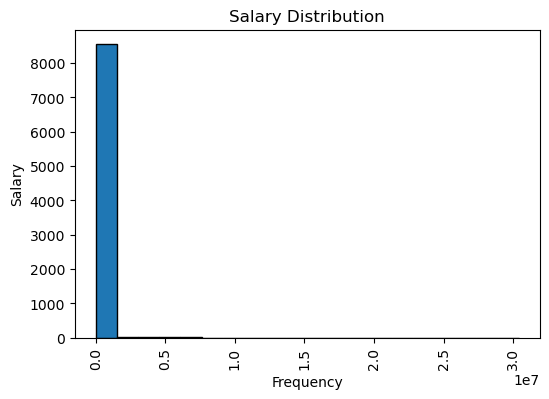

In [18]:

plt.figure(figsize=(6, 4))
plt.hist(df["salary"], bins=20, edgecolor="black")
plt.xlabel("Frequency")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.title("Salary Distribution")
plt.show()

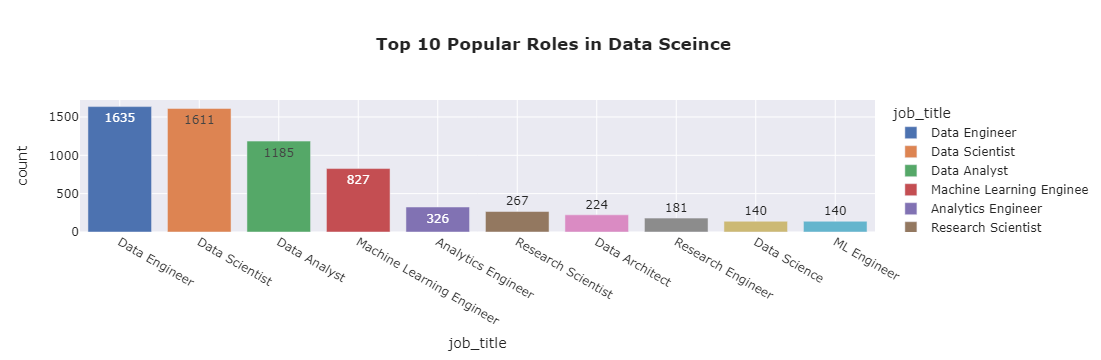

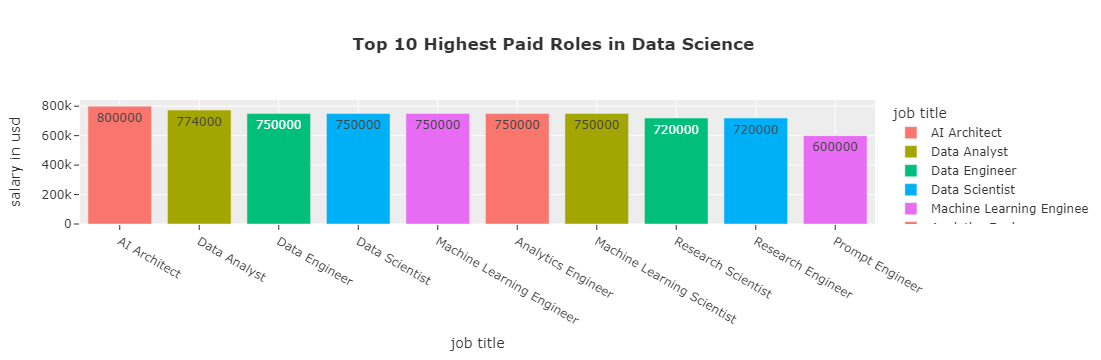

In [20]:
z=df['job_title'].value_counts().head(10)
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'job title','y':'count','text':'count'},template='seaborn',title='<b> Top 10 Popular Roles in Data Sceince')
fig.show()
fig=px.bar(df.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'salary in usd'},template='ggplot2',text='salary_in_usd',title='<b> Top 10 Highest Paid Roles in Data Science')
fig.show()

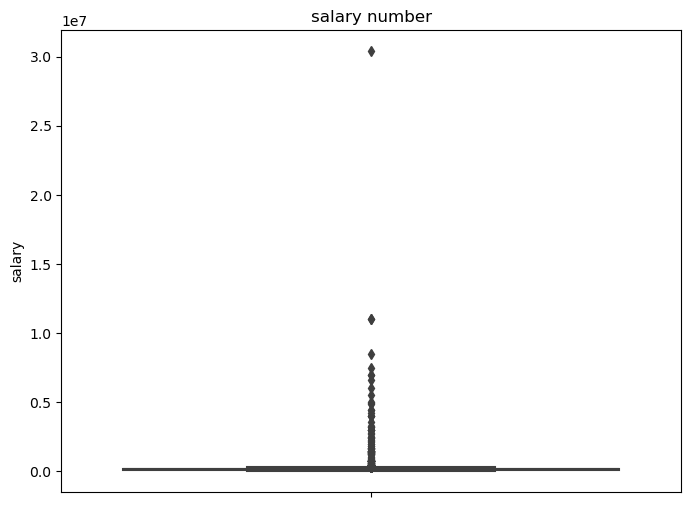

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df,y ='salary')
plt.ylabel("salary")
plt.title("salary number")
plt.show()

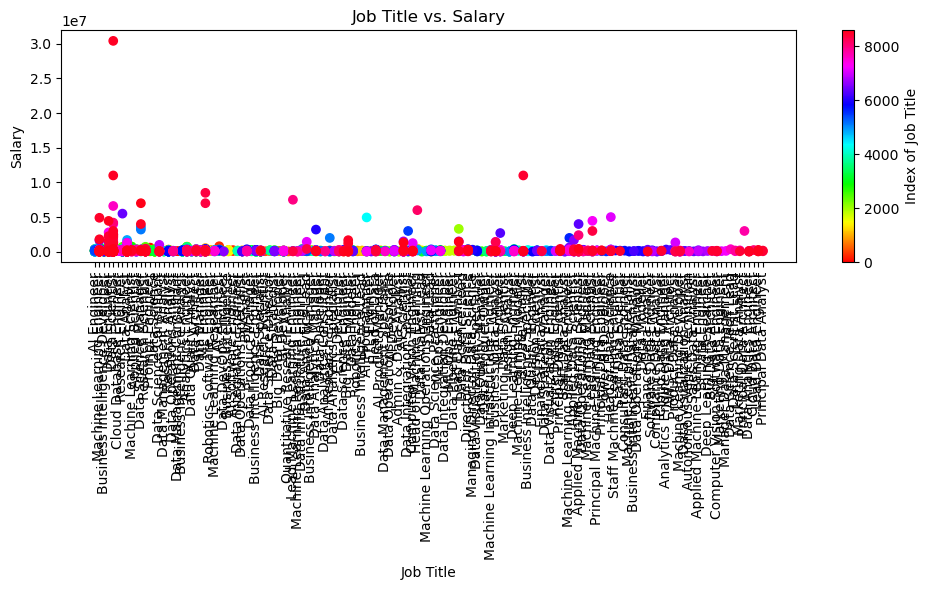

In [51]:
plt.figure(figsize=(10, 6))

# Plotting with scatter plot and assigning colors based on job titles
scatter = plt.scatter(df['job_title'], df['salary'], c=range(len(df)), cmap='hsv')

plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.title('Job Title vs. Salary')

# Adding color bar to show the colormap scale
plt.colorbar(scatter, label='Index of Job Title')

plt.tight_layout()
plt.show()









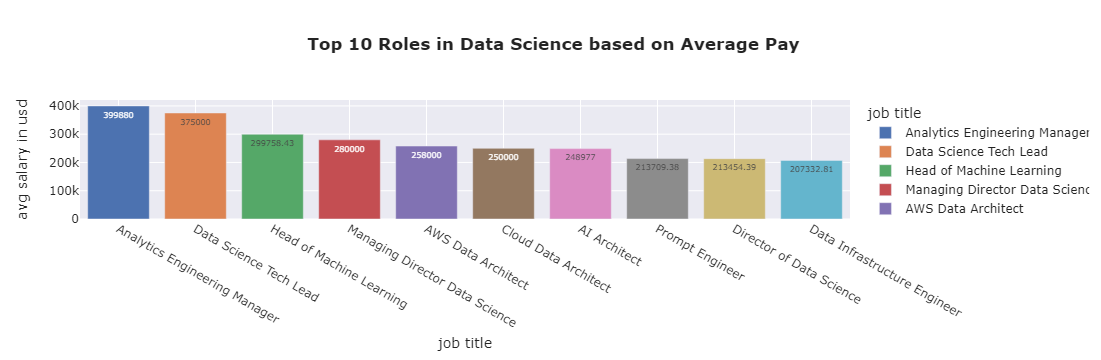

In [21]:

z=df.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False)
z['salary_in_usd']=round(z['salary_in_usd'],2)
fig=px.bar(z.head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'avg salary in usd'},text='salary_in_usd',template='seaborn',title='<b> Top 10 Roles in Data Science based on Average Pay')
fig.update_traces(textfont_size=8)
fig.show()

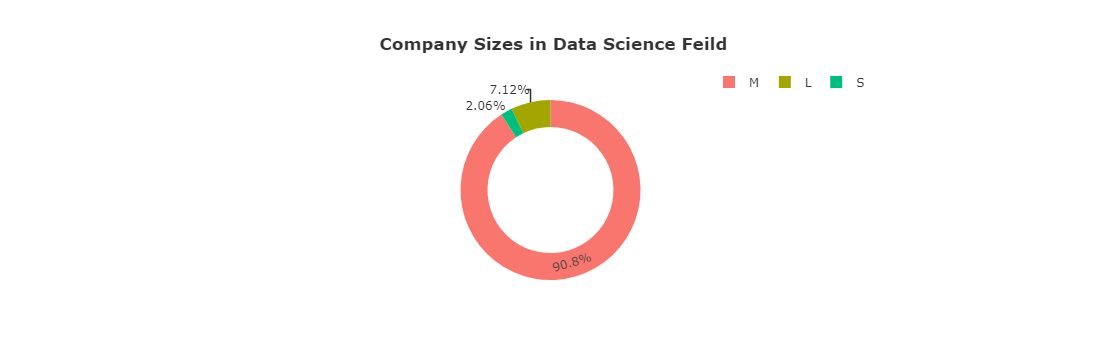

In [22]:

fig=px.pie(df.groupby('experience_level',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='experience_level',values='salary_in_usd',color='experience_level',hole=0.7,labels={'experience_level':'Experience level ','salary_in_usd':'count'},template='ggplot2',title='<b>Total Jobs Based on Experience Level')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig=px.pie(df.groupby('employment_type',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='employment_type',values='salary_in_usd',color='employment_type',hole=0.7,labels={'employment_type':'Employment level','salary_in_usd':'count'},template='seaborn',title='<b> Total Jobs Based on Employee Level')
fig.update_layout(title_x=0.5)
fig=px.pie(df.groupby('remote_ratio',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='remote_ratio',values='salary_in_usd',color='remote_ratio',hole=0.7,labels={'remote_ratio':'remote ratio','salary_in_usd':'count'},template='plotly',title='<b> Remote Ratio')
fig.update_layout(title_x=0.5)
fig=px.pie(df.groupby('company_size',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='company_size',values='salary_in_usd',color='company_size',hole=0.7,labels={'company_size':'Company Size','salary_in_usd':'count'},template='ggplot2',title='<b> Company Sizes in Data Science Feild')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))


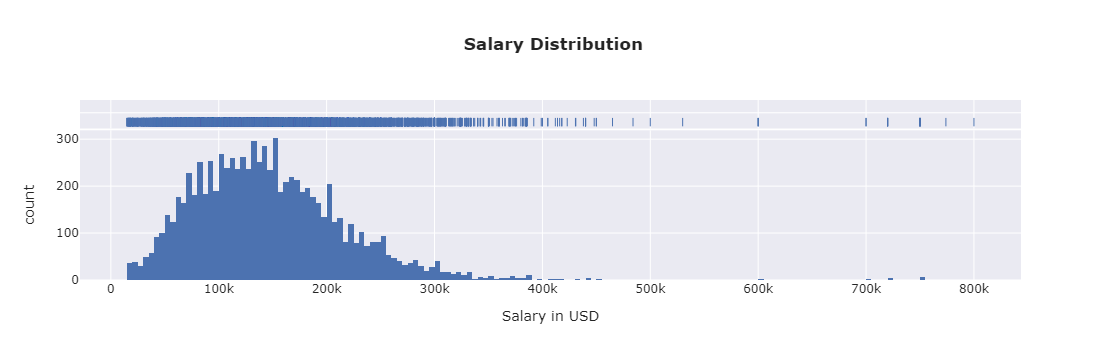

In [23]:
px.histogram(df,x='salary_in_usd',marginal='rug',template='seaborn',labels={'salary_in_usd':'Salary in USD'},title='<b> Salary Distribution')


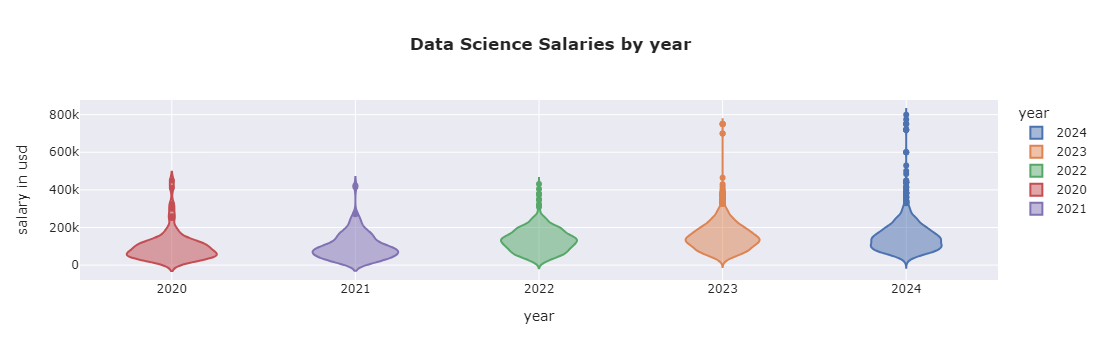

In [24]:
px.violin(df,x='work_year',y='salary_in_usd',color='work_year',labels={'work_year':'year','salary_in_usd':'salary in usd'},template='seaborn',title='<b>Data Science Salaries by year')


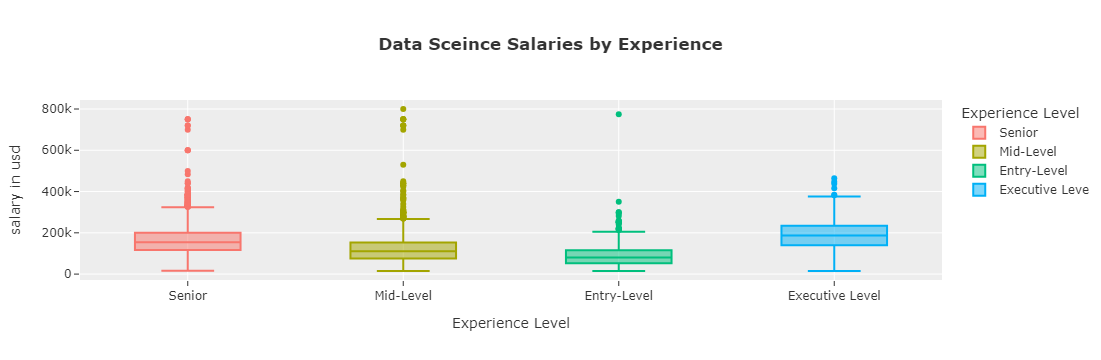

In [28]:
px.box(df,x='experience_level',y='salary_in_usd',color='experience_level',template='ggplot2',labels={'experience_level':'Experience Level','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by Experience')


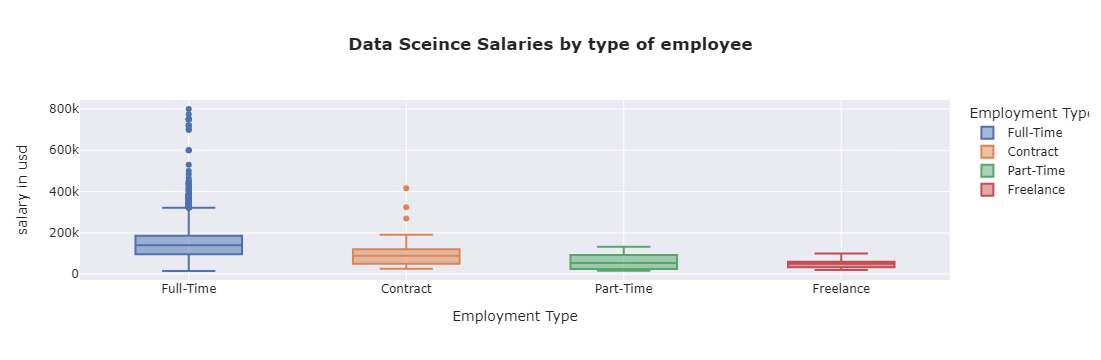

In [29]:
px.box(df,x='employment_type',y='salary_in_usd',color='employment_type',template='seaborn',labels={'employment_type':'Employment Type','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by type of employee')


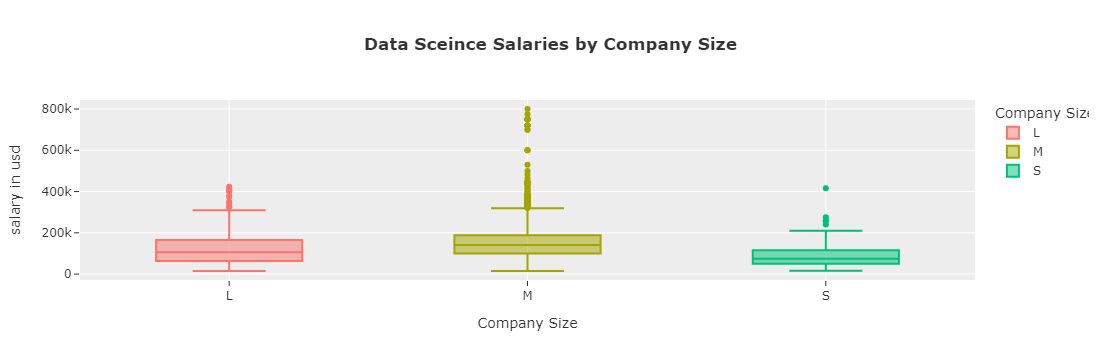

In [30]:
px.box(df,x='company_size',y='salary_in_usd',color='company_size',template='ggplot2',labels={'company_size':'Company Size','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by Company Size')
